In [2]:
! pip install gym

     |████████████████████████████████| 1.6MB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 42.5MB/s eta 0:00:01
     |████████████████████████████████| 28.3MB 25.4MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/e9/26/9b/8a1a6599a91077a938ac4348cc3d3ac84bfab0dbfddeb4c6e7
Successfully built gym
ERROR: spyder 3.3.3 requires pyqt5<=5.12; python_version >= "3", which is not installed.
  Found existing installation: cloudpickle 0.7.0
    Uninstalling cloudpickle-0.7.0:
      Successfully uninstalled cloudpickle-0.7.0


In [3]:
import gym
import random
import numpy as np
import seaborn as sns
from keras.models     import Sequential
from keras.layers     import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [4]:
# Let's create the Cart Pole OpenAI Gym game environment and define some constants
env = gym.make('CartPole-v1')
env.reset()
goal_steps = 500
score_requirement = 60
intial_games = 10000

In [13]:
model = Sequential()
model.add(Dense(128, input_shape=(4,), activation='tanh', name='in'))
model.add(Dense(52, activation='tanh'))
model.add(Dense(2, activation='softmax', name='out'))
model.compile(loss='mse', optimizer=Adam())

In [14]:
test = np.array([0.03075273,  0.22894843,  0.00086323, -0.30798407])
test.shape = (1,4)

np.argmax(model.predict(test), axis=1)[0]
result = model.predict(test)
result.shape = (2,1)
result

array([[0.4637847],
       [0.5362153]], dtype=float32)

In [15]:
epsilon = 0.5
epsilons = []
scores = []
for game_index in range(intial_games):
    score = 0
    game_memory = []
    observation, reward, done, info = env.step(random.randrange(0, 2))
    epsilon = epsilon * 0.9995
    epsilons.append(epsilon)
    
    for step_index in range(goal_steps):
        observation.shape = (1,4)
        policy = model.predict(observation)
        policy.shape = (2,1)
        if random.random() < epsilon: #epsilon greedy exploration
            policy = np.flip(policy)
        action = np.argmax(policy, axis=0)[0]
        action = random.randrange(0,2)
        previous_observation = observation
        observation, reward, done, info = env.step(action)
        game_memory.append([previous_observation, action])

        score += reward
        if done:
            break
    #print(score)
    scores.append(score)
    if score >= score_requirement:
        for data in game_memory:
            if data[1] == 1:
                output = np.array([0, 1])
            elif data[1] == 0:
                output = np.array([1, 0])
            print('training model')
            #print(output)
            output.shape = (1,2)
            model.fit(data[0], output, epochs=10, verbose=0)

    env.reset()



training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training model
training m

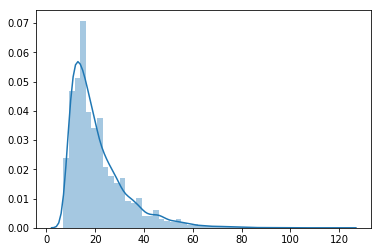

In [16]:
sns.distplot(scores)

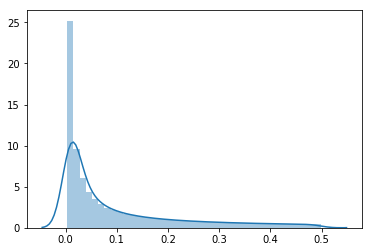

In [17]:
sns.distplot(epsilons)

In [18]:
model.save('t-agent.h5')


In [19]:
!ls 

t-agent.h5


In [22]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f627bebb44974cc5a73efe23105891f4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kx8KnsivcP0GZuH9Rqb4SQCgkNu9jSwbgPZuOEndlnSp',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')


credentials = {
    'IAM_SERVICE_ID': 'iam-ServiceId-fe383a6e-53a3-4447-94ef-579652b22734',
    'IBM_API_KEY_ID': 'kx8KnsivcP0GZuH9Rqb4SQCgkNu9jSwbgPZuOEndlnSp',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'courserabddeg-donotdelete-pr-x3n6zvw0htb1sf',
    'FILE': 'y_arma_data.csv'
}
client_f627bebb44974cc5a73efe23105891f4.upload_file('t-agent.h5', credentials['BUCKET'],'t-agent.h5')
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.

